# LWA1 Map - 80 MHz

Maps -- Filenames


lwa1_80mhz_map -- "lwa1_80mhz_map.fits"
lwa1_80mhz_noisemap -- "lwa1_80mhz_noisemap.fits"
lwa1_80mhz_maskmap -- "lwa1_80mhz_maskmap.fits"
lwa1_80mhz_beamcls -- "lwa1_80mhz_beam.fit"



Need:

param file
default file defining details about map
job submission file

telescope details:


declination, resolution, scan strategy, mapmaking

LWA1 

Sky maps released by the LWA1 group are in HEALPix sky pixelization for equatorial coordinates with an approximate pixel size of 0.23 degrees and in equatorial Mollweide projection with an approximate pixel size of 0.3 degrees.

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from cmath import nan
from datetime import datetime
now = datetime.now()
# plt.rcParams['savefig.facecolor']='white'

In [11]:
def change_coord(m, coord):
    """ Change coordinates of a HEALPIX map

    Parameters
    ----------
    m : map or array of maps
      map(s) to be rotated
    coord : sequence of two character
      First character is the coordinate system of m, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

    Example
    -------
    The following rotate m from galactic to equatorial coordinates.
    Notice that m can contain both temperature and polarization.
    >>>> change_coord(m, ['G', 'C'])
    """
    # Basic HEALPix parameters
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]

lwa1 map size:
 786432
no. of nan pixels (to be masked):
 140798
(1) no. of pixels <= 0:
 0
(2) no. of pixels <= 0:
 0


setting the output map dtype to [dtype('>f4')]


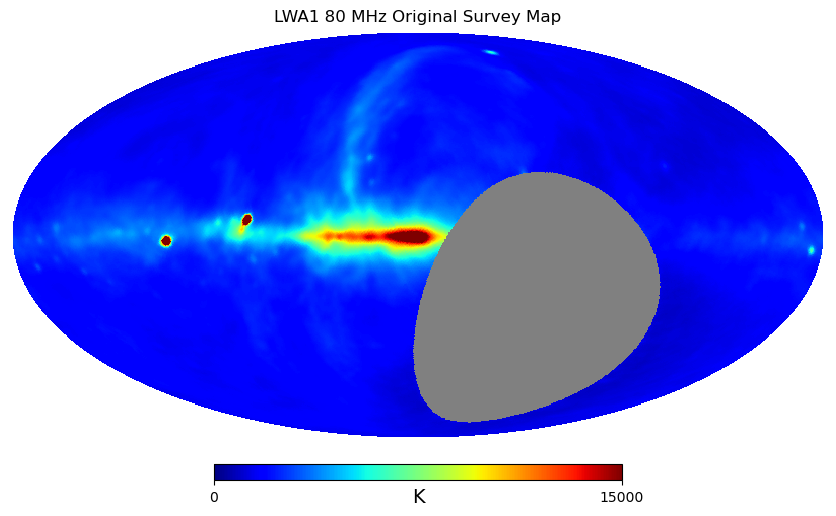

In [12]:
from cmath import nan

# Import lwa1-80 healpix map in equatorial coords
file_C_lwa180 = "healpix-equat_coord_map-80.fits"
celest_lwa180 = hp.fitsfunc.read_map(file_C_lwa180)

###############################
# Random stuff I was trying
###############################
# hp.fitsfunc.write_map("healpix-galactic_coord_map-80.fits", celest_lwa180, coord='G', overwrite=True)
# file_G_lwa180 = "healpix-galactic_coord_map-80.fits"
# map_lwa180 = hp.fitsfunc.read_map(file_G_lwa180)
# rot_cg = hp.Rotator(coord="CG")
# map_lwa180 = rot_cg.rotate_map_pixel(celest_lwa180)
###############################

#
# Change coordinates from equatorial to galactic/celestial
#
lwa1_80mhz_map = change_coord(celest_lwa180, ['C', 'G'])
print("lwa1 map size:\n", lwa1_80mhz_map.size)

###############################
# 
# Doing these checks for bad pixels, aka pixel values <= 0.
# 
###############################
# Find the nan-valued pixels
idx_mask_sig = np.argwhere(np.isnan(lwa1_80mhz_map))
print("no. of nan pixels (to be masked):\n", idx_mask_sig.size)
# print("indices for nan pixels (to be masked):\n", idx_mask_sig)

# Find the <=0 pixels:
idx_badpix_sig = np.where(lwa1_80mhz_map <= 0) 
# The above is a tuple with at least 1 element, i.e. an empty array.
# So to check the size of the array contained by the tuple, I need to extract the array (as below)
idx_badpix_sig = idx_badpix_sig[0]
print("(1) no. of pixels <= 0:\n", idx_badpix_sig.size)
print("(2) no. of pixels <= 0:\n", (lwa1_80mhz_map <= 0).sum()) # This is another way to check for pixels valued <=0
# print("indices of pixels <= 0:\n", idx_badpix_sig)

# 
# if there are pixels <=0, we could set them to 'nan' as:
# lwa1_80mhz_map[idx_badpix_sig] = nan
# 

###############################
# 
# So far, there are no pixels <= 0, but there are quite a few that are nan-valued.
# I believe these are just the ones that are already greyed out (and therefore will be masked).
#
###############################

#
# Display the map to check if it's okay
#
hp.mollview(lwa1_80mhz_map, title="LWA1 80 MHz Original Survey Map", min=0.0, max=15000.0, cmap='jet', unit='K')
# hp.mollview(celest_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat', unit='kK')
# hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# hp.mollview(map_lwa180, coord=['C', 'G'])
# hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

#
# Save the map as a fits file with the right name etc.
#
hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_map.fits", lwa1_80mhz_map, overwrite=True)

# 
# Save the map as a png image
# 
plt.savefig('map-images/lwa1_80mhz_map.png')


BEFORE NAN-ing bad-pixels:
no. of nan pixels (to be masked):
 140798
(1) no. of pixels <= 0:
 167
(2) no. of pixels <= 0:
 167

AFTER NAN-ing bad pixels:
(1) no. of pixels <= 0:
 0
(2) no. of pixels <= 0:
 0
no. of nan pixels (to be masked):
 140965


setting the output map dtype to [dtype('>f4')]


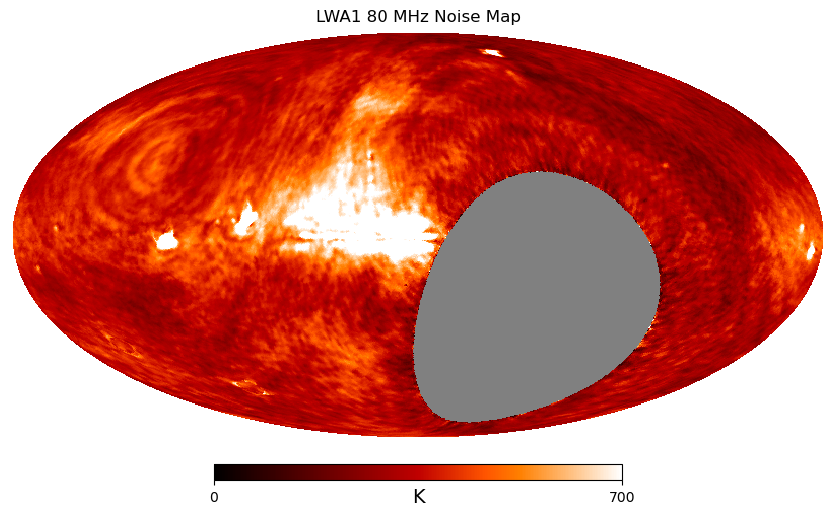

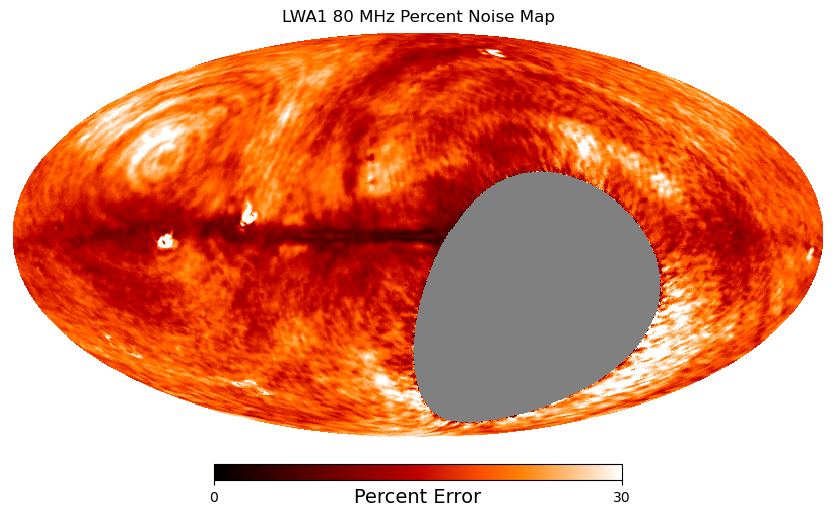

In [13]:
file_noise_C_lwa180 = "healpix-all-sky-rav-wsclean-err-80.fits"
noise_C_lwa180 = hp.fitsfunc.read_map(file_noise_C_lwa180)
lwa1_80mhz_noisemap = change_coord(noise_C_lwa180, ['C', 'G'])

###############################
# 
# Doing these checks for bad pixels, aka pixel values <= 0.
# 
###############################
print("\nBEFORE NAN-ing bad-pixels:")
#
# Find the nan-valued pixels
#
idx_mask_noise = np.argwhere(np.isnan(lwa1_80mhz_noisemap))
print("no. of nan pixels (to be masked):\n", idx_mask_noise.size)
# print("indices for nan pixels (to be masked):\n", idx_mask_noise)

#
# Find the <=0 pixels:
#
idx_badpix_noise = np.where(lwa1_80mhz_noisemap <= 0)
# The above is a tuple with at least 1 element, i.e. an empty array.
# So to check the size of the array contained by the tuple, I need to extract the array (as below)
idx_badpix_noise = idx_badpix_noise[0]
print("(1) no. of pixels <= 0:\n", idx_badpix_noise.size)
print("(2) no. of pixels <= 0:\n", (lwa1_80mhz_noisemap <= 0).sum()) # This is another way to check for pixels valued <=0
# print("indices of pixels <= 0:\n", idx_badpix_noise)

#
# if there are pixels <=0 (and there are quite a few!), we set them to 'nan' as: 
#
lwa1_80mhz_noisemap[idx_badpix_noise] = nan

#
# Now check again to see if there are any bad pixels left...
#
idx_badpix_noise = np.where(lwa1_80mhz_noisemap <= 0)[0]
print("\nAFTER NAN-ing bad pixels:")
print("(1) no. of pixels <= 0:\n", idx_badpix_noise.size)
print("(2) no. of pixels <= 0:\n", (lwa1_80mhz_noisemap <= 0).sum()) # This is another way to check for pixels valued <=0
# print("indices of pixels <= 0:\n", idx_badpix_noise)

# 
# Now we update our array of indices for nan-pixels
# 
idx_mask_noise = np.argwhere(np.isnan(lwa1_80mhz_noisemap))
print("no. of nan pixels (to be masked):\n", idx_mask_noise.size)

###############################
# 
# So far, there are ???
#
###############################

#
# Display the noise map to check if it's okay
#
hp.mollview(lwa1_80mhz_noisemap, title="LWA1 80 MHz Noise Map", min=0.0, max=700, cmap='gist_heat', unit='K')
# Save the map as a fits file with the right name etc.
hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_noisemap.fits", lwa1_80mhz_noisemap, overwrite=True)

#
# Create PERCENT-NOISE map from the noise map
#
percentnoise_lwa180 = lwa1_80mhz_noisemap/lwa1_80mhz_map * 100
#
# Display the percent-noise map to check if it's okay
#
hp.mollview(percentnoise_lwa180, title="LWA1 80 MHz Percent Noise Map", min=0.0, max=30.0, cmap='gist_heat', unit='Percent Error')

# 
# Save both the noise maps as a png images
# 
plt.savefig('map-images/lwa1_80mhz_noisemap.png')
plt.savefig('map-images/percentnoise_lwa180.png')



# print(lwa1_80mhz_noisemap.min())

The noise mask is bigger than the intensity map mask (i.e. the intensity mask is a SUBSET of the noise mask), so probably better to create the mask map using the noise map.

In [14]:
print(idx_mask_sig.size, idx_mask_noise.size)
# Check if there are any mask-pix in the intensity map that are not in the noise map
print(np.setdiff1d(idx_mask_sig, idx_mask_noise).size)
# Check if there are any mask-pix in the noise map that are not in the intensity map
noisediffsig = np.setdiff1d(idx_mask_noise, idx_mask_sig)
print(noisediffsig)
# np.where(idx_mask_sig != idx_mask_noise)



#
# So the mask we'll use is the noise map mask:
#
lwa1_80mhz_map[noisediffsig] = nan
idx_mask = idx_mask_noise

#
# Save the map as a fits file with the right name etc.
#
hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_map.fits", lwa1_80mhz_map, overwrite=True)

setting the output map dtype to [dtype('>f4')]


140798 140965
0
[238939 238940 238944 238945 239955 239962 239965 239966 239971 239972
 240976 240977 240978 240979 240982 240983 240997 240998 241001 241004
 241993 241994 241995 241996 241998 241999 242028 242029 242030 242033
 243017 243055 243060 243061 244037 244038 244085 244086 245112 246080
 246081 246138 247104 247166 248124 248125 248190 248191 249146 249147
 250168 250169 250243 251191 251192 251269 252212 252213 252294 252295
 253236 253320 253321 254257 254345 254346 255279 255280 255281 255371
 256302 256303 257324 259472 260496 261416 261417 262439 262440 262547
 262548 263463 264599 265508 265624 268698 269600 269723 269724 270622
 270623 272798 273692 274848 275873 277784 277785 278807 278808 279831
 281877 283047 284071 284946 285969 285970 286992 286993 287146 288016
 292109 292270 293133 293294 294319 298250 298418 299272 299273 300297
 301319 304390 304565 310713 315647 317694 318718 318909 319741 321788
 322812 326906 327929 335094 335301 336117 341235 342259 3473

In [15]:
goodmask_sig = hp.mask_good(lwa1_80mhz_map)
goodmask_noise = hp.mask_good(lwa1_80mhz_noisemap)
lwa1_80mhz_maskmap_small = goodmask_sig.astype(int)
lwa1_80mhz_maskmap_big = goodmask_noise.astype(int)
# lwa1_80mhz_maskmap[idx_badpix_noise] = 0

hp.fitsfunc.write_map("commander_inputs/lwa1_80mhz_maskmap.fits", lwa1_80mhz_maskmap_big, overwrite=True)

# hp.mollview(lwa1_80mhz_maskmap)

setting the output map dtype to [dtype('int64')]


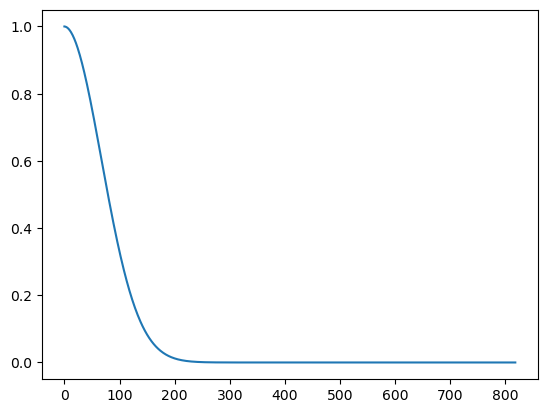

In [16]:
# 
# find fwhm: beamsize*2*pi/180
# lmax: nside*3 - 1 (but add some here)
# compute blms using healpy.spherfunc.gauss_beam with fwhm and lmax as input
# healpy write cls to fits file
# 

beamsize = 2.0
fwhm = 2.0*np.pi/180
nside = 256
lmax = nside * 3 + 50
lwa1_80mhz_beamcls = hp.sphtfunc.gauss_beam(fwhm=fwhm, lmax=lmax)

hp.fitsfunc.write_cl(filename='commander_inputs/lwa1_80mhz_beam.fit', cl=lwa1_80mhz_beamcls, overwrite=True)

x = range(lwa1_80mhz_beamcls.size)
plt.plot(x, lwa1_80mhz_beamcls)

In [17]:
# What was this again??
hp.fit_dipole(lwa1_80mhz_map, bad=nan)

(2214.0035996208762, array([893.18359529, 507.1652158 , -16.81614988]))

## Maps produced by Commander run

In [2]:
date = now.strftime("%y%m%d")
print(date)

221027


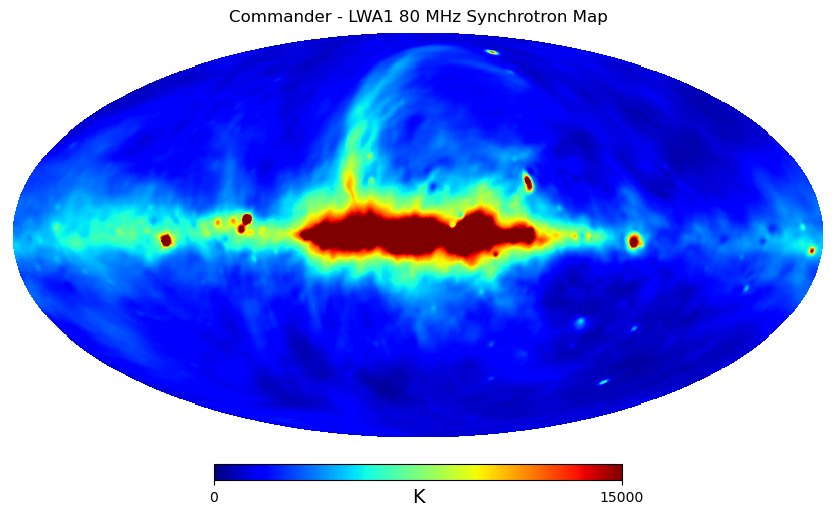

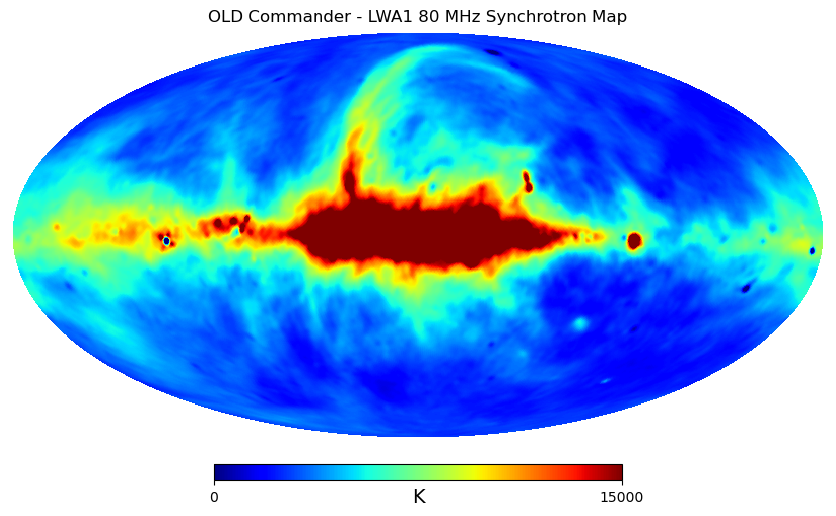

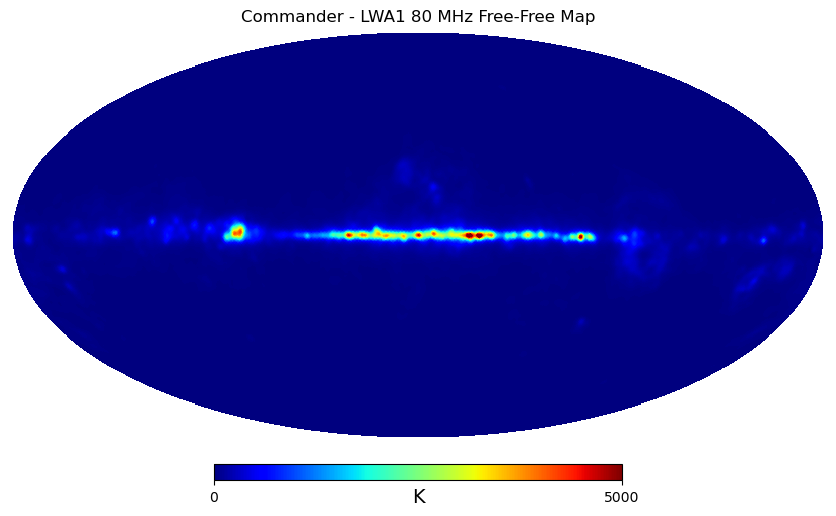

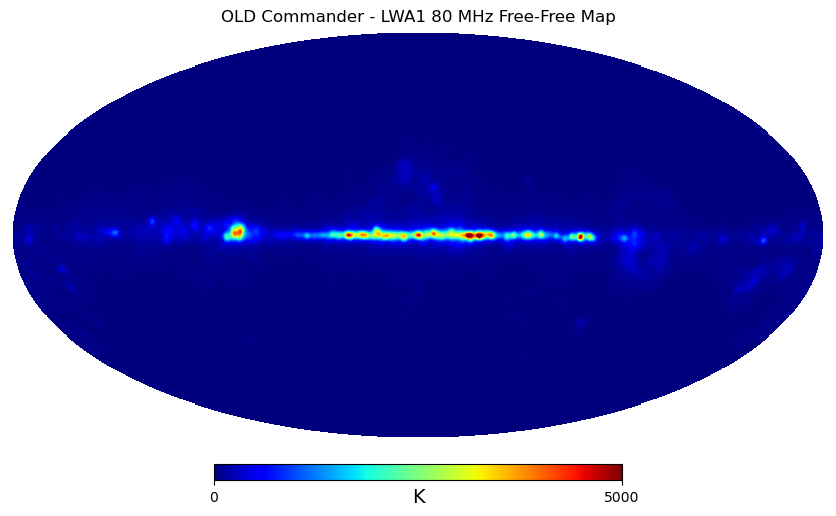

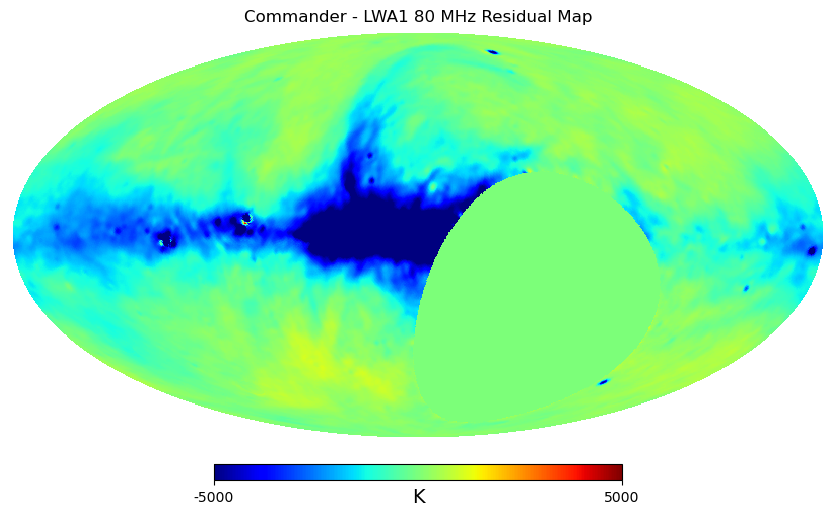

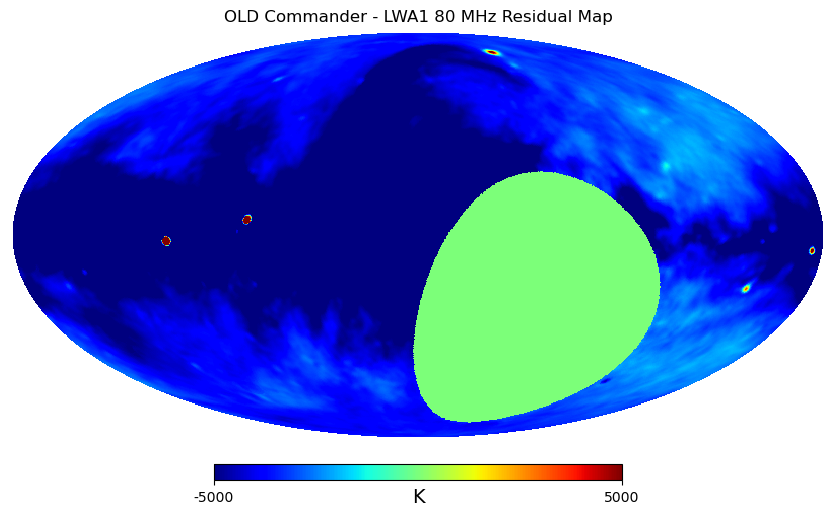

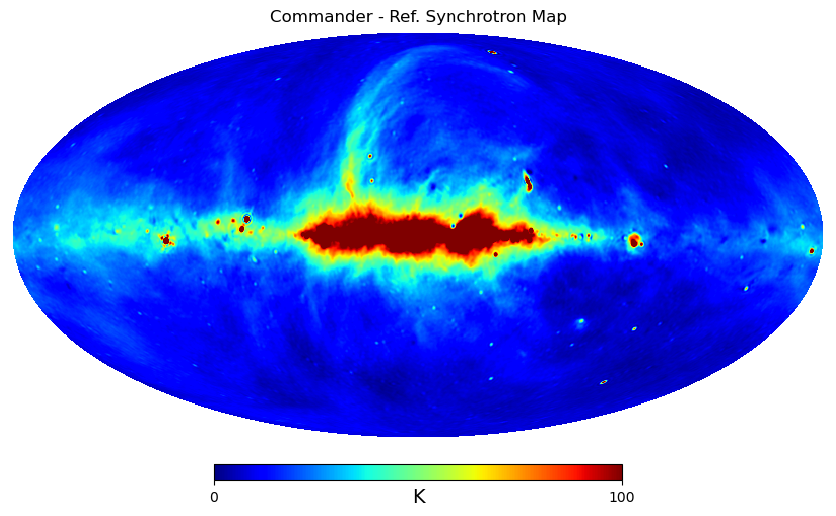

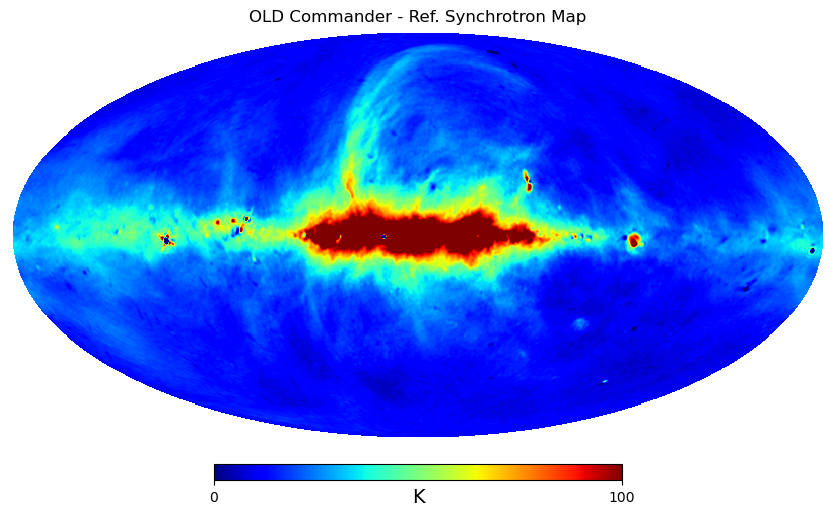

In [19]:
file_comm_synch_lwa180_old = "commander_outputs/commander5/synch_80MHz-LWA1_c0001_k000005.fits" # what is the difference between this and just synch
file_comm_synch_lwa180 = "commander_outputs/221027-commout/synch_80MHz-LWA1_c0001_k000010.fits" # what is the difference between this and just synch

file_comm_res_lwa180_old = "commander_outputs/commander5/res_80MHz-LWA1_c0001_k000005.fits" # residual map... but residual between what and what?
file_comm_res_lwa180 = "commander_outputs/221027-commout/res_80MHz-LWA1_c0001_k000010.fits" # residual map... but residual between what and what?

file_comm_synch_old = "commander_outputs/commander5/synch_c0001_k000005.fits"
file_comm_synch = "commander_outputs/221027-commout/synch_c0001_k000010.fits"

file_comm_ff_old = "commander_outputs/commander5/ff_80MHz-LWA1_c0001_k000005.fits" # free-free emission map
file_comm_ff = "commander_outputs/221027-commout/ff_80MHz-LWA1_c0001_k000010.fits" # free-free emission map

synch_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_synch_lwa180_old)
res_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_res_lwa180_old)
synch_comm_old = hp.fitsfunc.read_map(file_comm_synch_old)
ff_80MHz_LWA1_comm_old = hp.fitsfunc.read_map(file_comm_ff_old)

synch_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_synch_lwa180)
res_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_res_lwa180)
synch_comm = hp.fitsfunc.read_map(file_comm_synch)
ff_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_ff)


date = now.strftime("%y%m%d")
filename = 'temp_{date}'.format(date=date)

hp.mollview(synch_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=15000.0, cmap='jet', unit='K')
plt.savefig('map-images/{date}-synch_80MHz_LWA1_comm.png'.format(date=date))
hp.mollview(synch_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=15000.0, cmap='jet', unit='K')

hp.mollview(ff_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=5000.0, cmap='jet', unit='K')
plt.savefig('map-images/{date}-ff_80MHz_LWA1_comm.png'.format(date=date))
hp.mollview(ff_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=5000.0, cmap='jet', unit='K')

# hp.mollview(res_80MHz_LWA1_comm/1000, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', unit='kK')
hp.mollview(res_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-5000, max=5000, unit='K')
plt.savefig('map-images/{date}-res_80MHz_LWA1_comm.png'.format(date=date))
hp.mollview(res_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-5000, max=5000, unit='K')

hp.mollview(synch_comm/(10**6), title="Commander - Ref. Synchrotron Map", min=0.0, max=100.0, cmap='jet', unit='K')
plt.savefig('map-images/{date}-synch_comm.png'.format(date=date))
hp.mollview(synch_comm_old/(10**6), title="OLD Commander - Ref. Synchrotron Map", min=0.0, max=100.0, cmap='jet', unit='K')


# hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# hp.mollview(map_lwa180, coord=['C', 'G'])
# hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

In [ ]:

# file_commander_lwa180 = "other-outputs/synch_35MHz-LWA1_c0001_k000001.fits"
# synch_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_commander_lwa180)

# hp.mollview(synch_80MHz_LWA1_comm, cmap='gist_heat')
# # hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# # hp.mollview(map_lwa180, coord=['C', 'G'])
# # hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")